In [40]:
import numpy as np
from matplotlib import pyplot as plt, rcParams, cm

In [41]:
# matplotlib parameters:
default_params = {
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'font.size': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'xtick.top': True,  # draw ticks on the top side
    'xtick.major.top': True,
    'font.family': "Times New Roman",
    'mathtext.fontset': "stix",
    'mathtext.tt': "Times New Roman",
    'axes.linewidth': 1, 
    'xtick.major.width': 1,
    'xtick.major.size': 3,
    'xtick.direction': "in",
    'ytick.major.width': 1,
    'ytick.major.size': 3,
    'ytick.direction': "in",
    'ytick.right': True,
    'figure.dpi': 500,
}
rcParams.update(default_params)

# Part (a)

In [42]:
LAMBDA = [0.1, 0.3, 0.5, 0.7]  # scaling factor
RAND_RANGE = [-1, 1]  # range of random numbers
X_RANGE = [0.5, 10]  # range of x
N_POINTS = 100  # number of points in plot
SEED = 42  # set seed to get consistent, comparable results

np.random.seed(SEED)

In [43]:
def f(x):
    return np.sin(x - x**2) / x

In [44]:
def delta(x):
    rand_nums = np.random.rand(*x.shape)  # random numbers between 0 and 1
    rand_nums = RAND_RANGE[0] + rand_nums*(RAND_RANGE[1]-RAND_RANGE[0])
    return rand_nums

def f_noisy(x, lamb):
    return f(x) + lamb*delta(x)

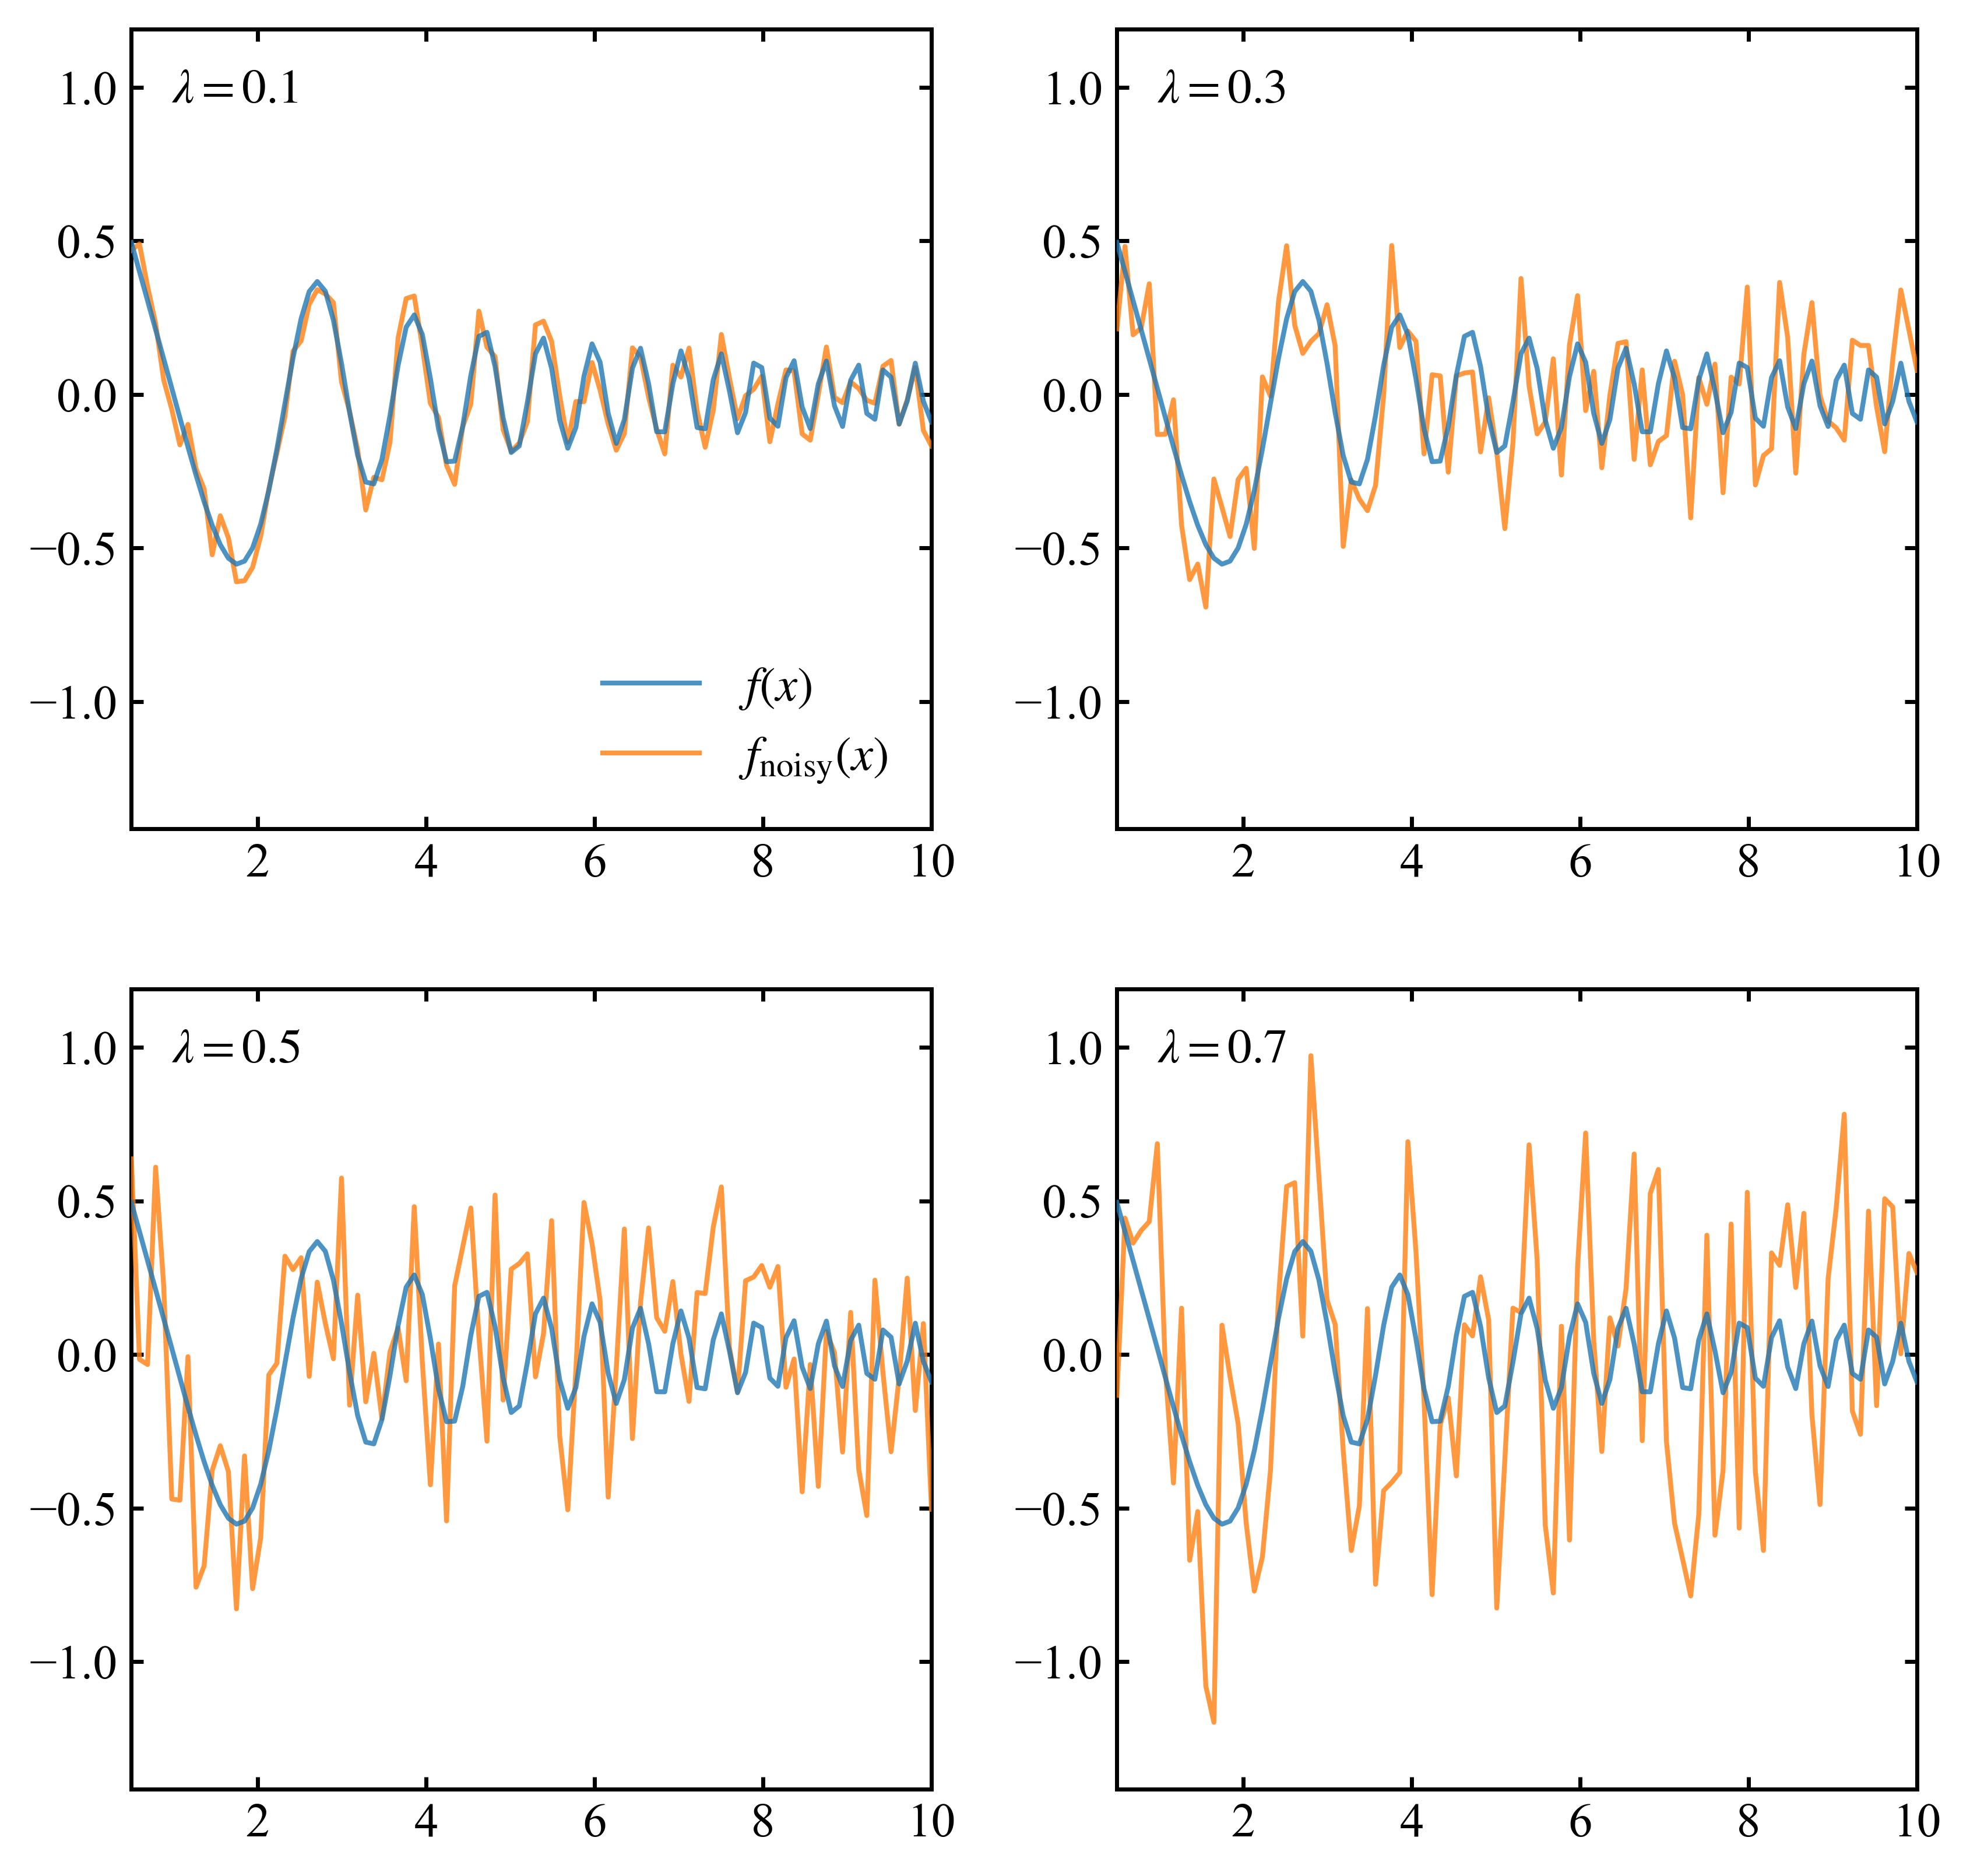

In [45]:
# prepare data:
x = np.linspace(*X_RANGE, N_POINTS)
dset = [(lamb, f(x), f_noisy(x, lamb)) for lamb in LAMBDA]

# plot data:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

xlim = X_RANGE
ymax = np.max(dset[-1][-1])
ymin = np.min(dset[-1][-1])
yrange = ymax - ymin
ylim = [ymin-0.1*yrange, ymax+0.1*yrange]

for i, ax in enumerate(axes.flatten()):
    lamb, y, y_noisy = dset[i]
    
    ax.plot(x, y, label=r"$f(x)$", alpha=0.8,
            linewidth=1.2, zorder=10)
    ax.plot(x, y_noisy, label=r"$f_{\rm noisy}(x)$", 
            alpha=0.8, linewidth=1.2, zorder=9)
    if i == 0:
        ax.legend(edgecolor="none", facecolor="none", loc="lower right")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # set aspect ratio of plot:
    ax.set_aspect((xlim[1]-xlim[0])/(ylim[1]-ylim[0]))
    ax.text(x=0.05, y=0.95, s=r"$\lambda="+str(lamb)+r"$", 
            transform=ax.transAxes, va="top", ha="left")
# fig.legend()

# save plot
fig.savefig("f_vs_fnoisy.pdf")

# Part (b)

In [46]:
def take_derivative(x, y):
    delta_x = x[1] - x[0]
    y_prime = (y[2:]-y[:-2])/2/delta_x
    return y_prime

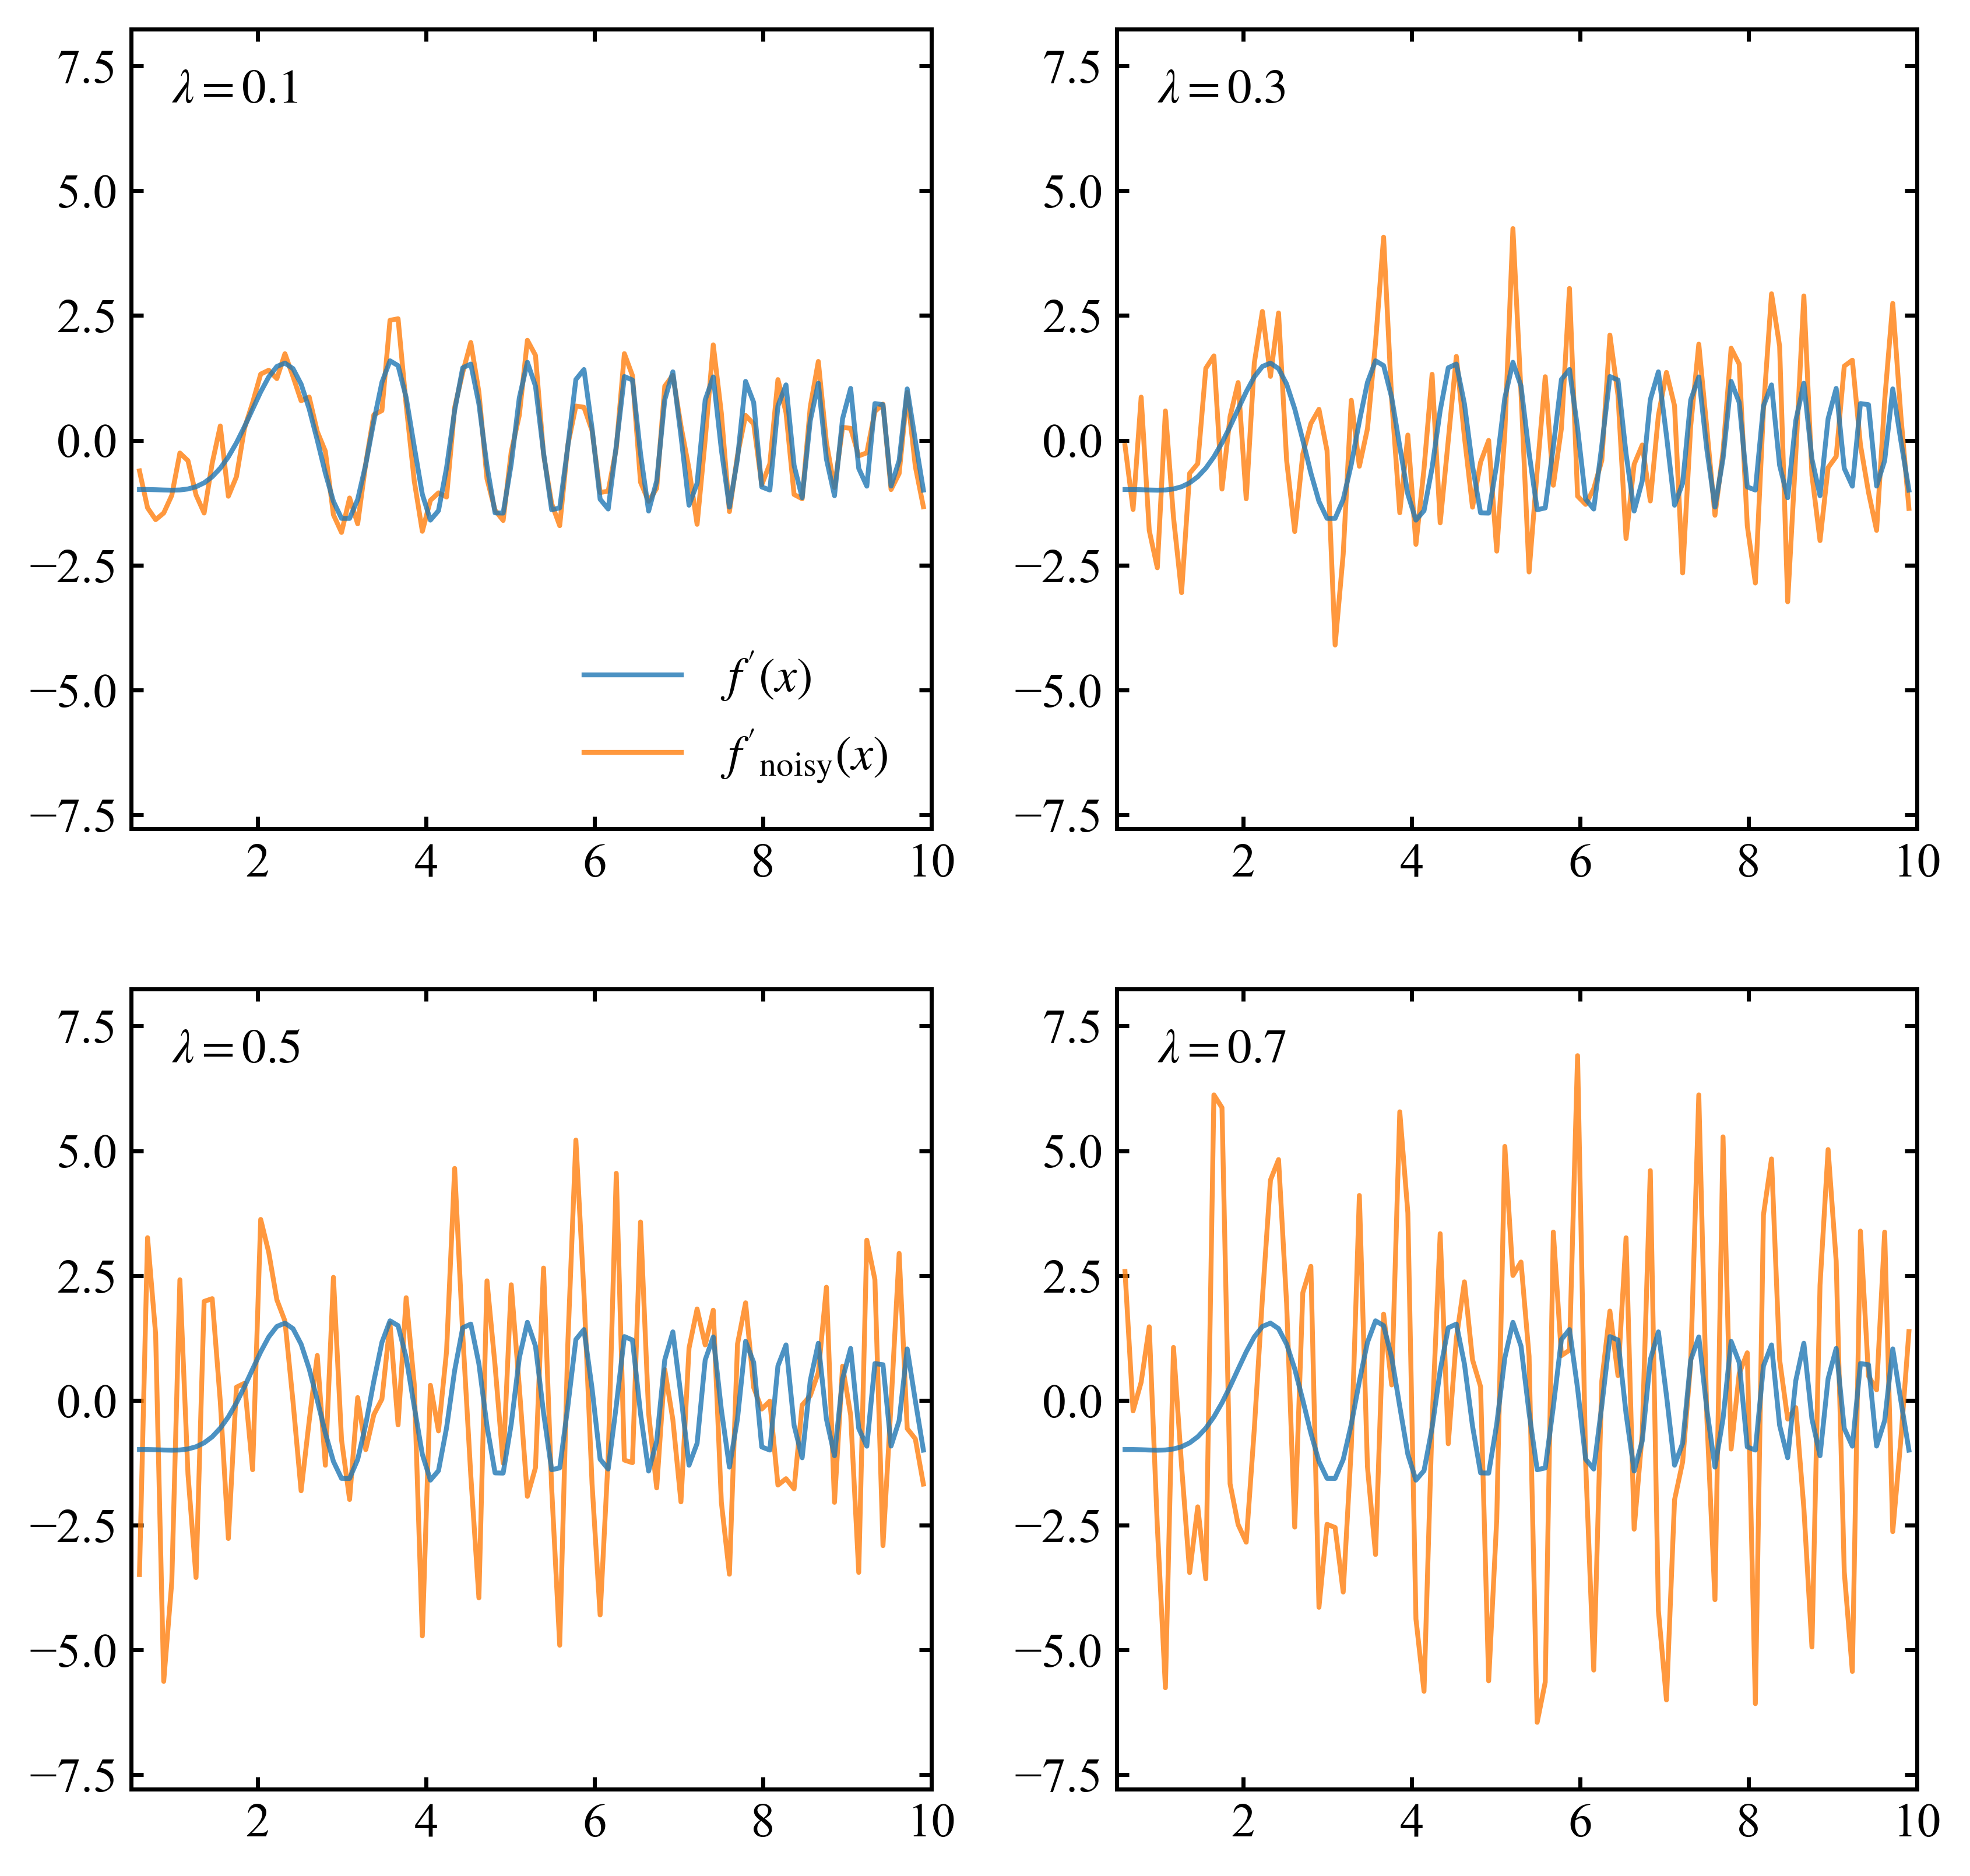

In [47]:
# prepare data:
trimmed_x = x[1:-1]
y_prime_lst = [take_derivative(x, y) for lamb, y, y_noisy in dset]
y_prime_noisy_lst = [take_derivative(x, y_noisy) for lamb, y, y_noisy in dset]

# plot data:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

xlim = X_RANGE
ymax = np.max(y_prime_noisy_lst[-1])
ymin = np.min(y_prime_noisy_lst[-1])
yrange = ymax - ymin
ylim = [ymin-0.1*yrange, ymax+0.1*yrange]

for i, ax in enumerate(axes.flatten()):
    lamb, y, y_noisy = dset[i]
    
    ax.plot(trimmed_x, y_prime_lst[i], label=r"$f'(x)$", alpha=0.8,
            linewidth=1.2, zorder=10)
    ax.plot(trimmed_x, y_prime_noisy_lst[i], label=r"$f'_{\rm noisy}(x)$", 
            alpha=0.8, linewidth=1.2, zorder=9)
    
    if i == 0:
        ax.legend(edgecolor="none", facecolor="none", loc="lower right")
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # set aspect ratio of plot:
    ax.set_aspect((xlim[1]-xlim[0])/(ylim[1]-ylim[0]))
    ax.text(x=0.05, y=0.95, s=r"$\lambda="+str(lamb)+r"$", 
            transform=ax.transAxes, va="top", ha="left")
# fig.legend()

# save plot
fig.savefig("f_prime_vs_f_prime_noisy.pdf")

In [48]:
noise_lst = [y_prime - y_prime_noise for y_prime, y_prime_noise \
                 in zip(y_prime_lst, y_prime_noisy_lst)]

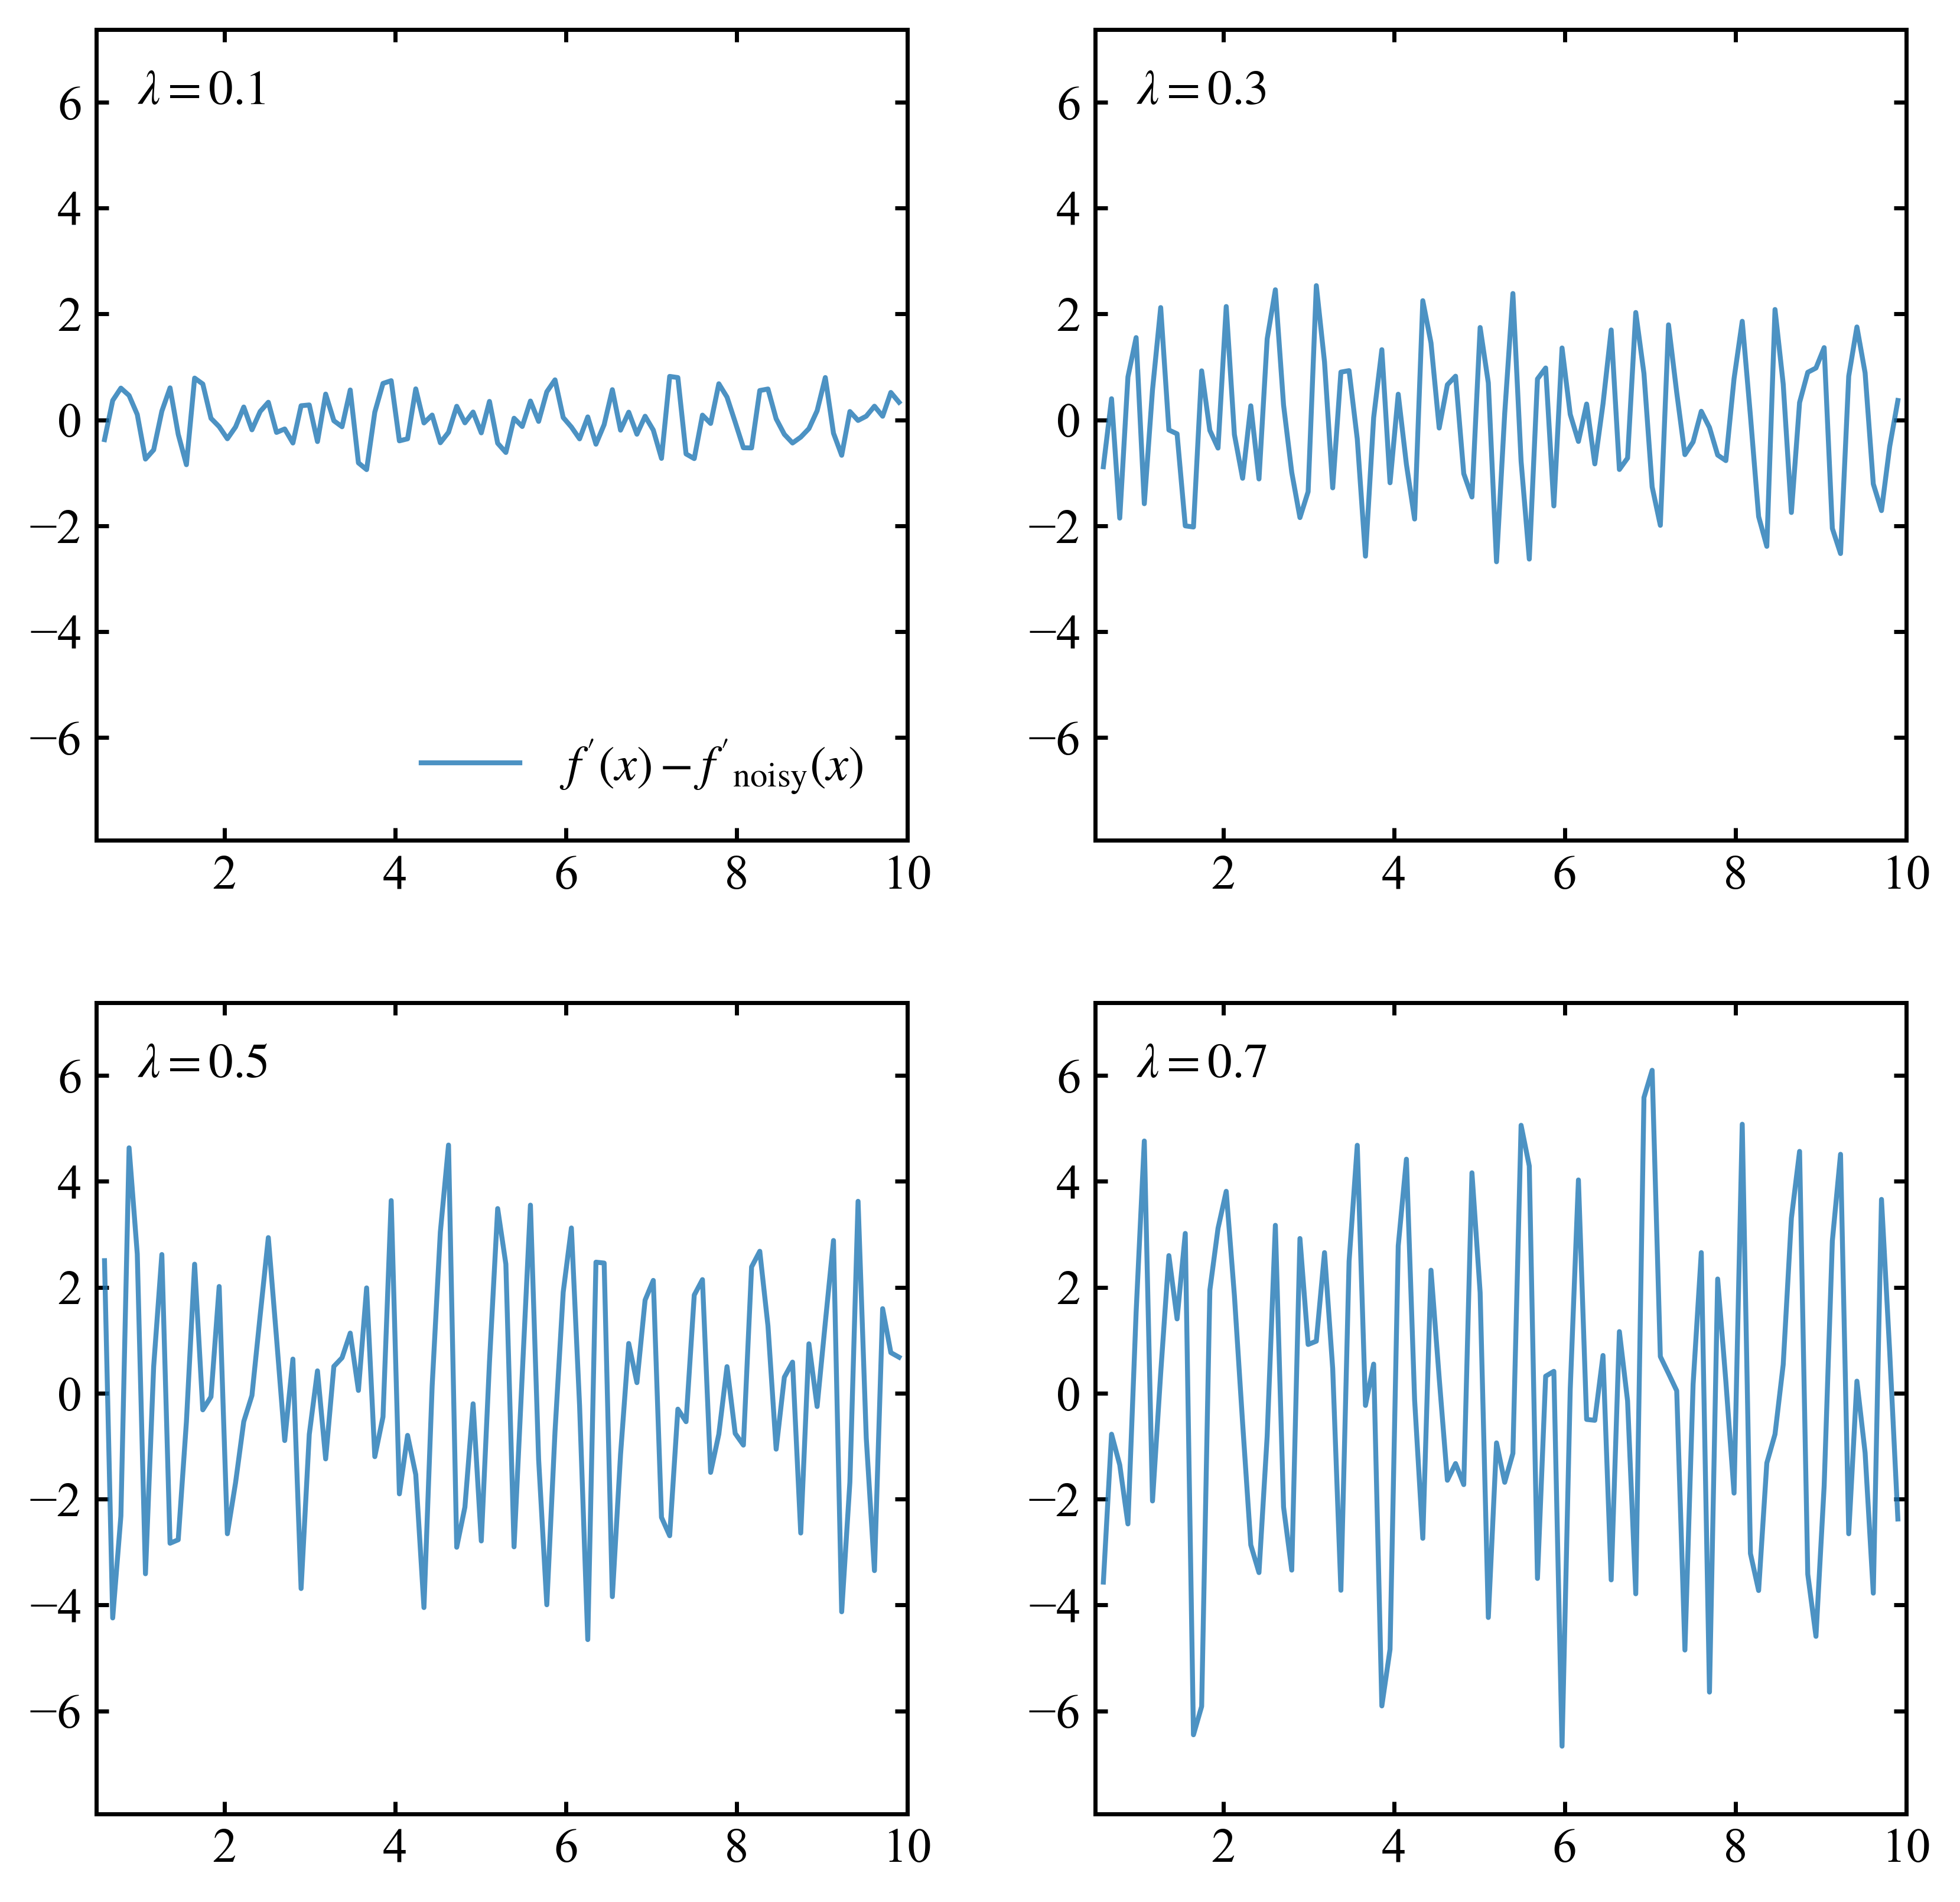

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# set limits of axes:
xlim = X_RANGE
ymax = np.max(noise_lst)
ymin = np.min(noise_lst)
yrange = ymax - ymin
ylim = [ymin-0.1*yrange, ymax+0.1*yrange]

# start plotting:
for i, ax in enumerate(axes.flatten()):
    noise = noise_lst[i]
    lamb = LAMBDA[i]
    
    ax.plot(trimmed_x, noise, label=r"$f'(x)-f'_{\rm noisy}(x)$", alpha=0.8,
            linewidth=1.2, zorder=10)
    
    if i == 0:
        ax.legend(edgecolor="none", facecolor="none", loc="lower right")
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # set aspect ratio of plot:
    ax.set_aspect((xlim[1]-xlim[0])/(ylim[1]-ylim[0]))
    ax.text(x=0.05, y=0.95, s=r"$\lambda="+str(lamb)+r"$", 
            transform=ax.transAxes, va="top", ha="left")
    
# save plot
fig.savefig("noise.pdf")

In [64]:
# # noise as one plot:
# fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# # set limits of axes:
# xlim = X_RANGE
# ymax = np.max(noise_lst)
# ymin = np.min(noise_lst)
# yrange = ymax - ymin
# ylim = [ymin-0.3*yrange, ymax+0.3*yrange]

# cstart = 0.2
# cend = 0.8
# colors_val = np.linspace(cstart, cend, len(LAMBDA))
# zorder = 1
# for color_val, lamb, noise in zip(colors_val, LAMBDA, noise_lst):
#     color = cm.inferno(color_val)
#     ax.plot(trimmed_x, noise, label=r"$\lambda="+str(lamb)+r"$",
#             color=color, alpha=0.7, linewidth=1, zorder=zorder)
#     zorder += 1
    
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)

# ax.set_aspect((xlim[1]-xlim[0])/(ylim[1]-ylim[0]))
# ax.legend()
# fig.savefig("noise_1subplot.pdf")

# part (c)

In [ ]:
def spline_cubic()